In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
import random

In [185]:
WRK="/workdir/users/pd378/oil_international/args_prevelence/custom_card_search/"
HUMAAN="/workdir/users/pd378/oil_international/args_prevelence/humann/rgi_analysis/"
rgi_out=pd.read_csv(WRK+"rgi_analysis/publication_tabs/reduced_compiled_genbank_reults.txt",sep='\t')
rgi_out.head(2)

/home/pd378/miniconda3/envs/jupyter2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,file,gene_rep,card_gene,Drug Class,Resistance Mechanism,AMR Gene Family,grouped_family,mechansim_and_beta_lactams,antibioitic,clinical,...,superkingdom,kingdom,phylum,class,order,family,genus,species,tax_name,tax_name_genus
0,GCA_005101105.1_PDT000113410.2_genomic.fna.gz.txt,OXA-659,OXA-193,carbapenem; cephalosporin; penam,antibiotic inactivation,OXA beta-lactamase,Class D beta-lactamase,beta-lactams,beta-lactams,NaN,...,Bacteria,NaN,Proteobacteria,Epsilonproteobacteria,Campylobacterales,Campylobacteraceae,Campylobacter,NaN,Campylobacter jejuni,Campylobacter
1,GCA_005101165.1_PDT000137997.2_genomic.fna.gz.txt,OXA-659,OXA-193,carbapenem; cephalosporin; penam,antibiotic inactivation,OXA beta-lactamase,Class D beta-lactamase,beta-lactams,beta-lactams,NaN,...,Bacteria,NaN,Proteobacteria,Epsilonproteobacteria,Campylobacterales,Campylobacteraceae,Campylobacter,NaN,Campylobacter jejuni,Campylobacter


### Graph the total number of genomes over time

<AxesSubplot:xlabel='year', ylabel='year_count'>

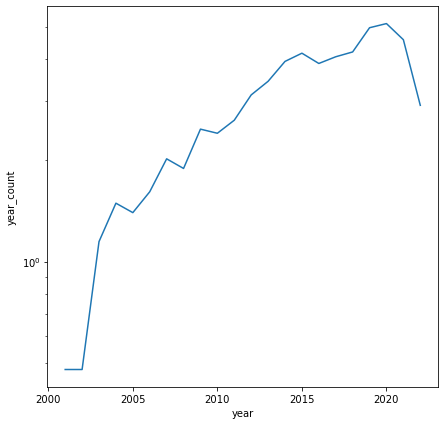

In [187]:
genome_counts=rgi_out[["file","year"]].drop_duplicates()
genomes_per_year=genome_counts.groupby("year").size().reset_index(name="year_count")
genomes_per_year["year"]=genomes_per_year["year"].astype('int')
genomes_per_year=genomes_per_year.sort_values("year")

cumulative_list=[]
count=0
for item in genomes_per_year["year_count"]:
    count+=item
    cumulative_list.append(count)
genomes_per_year["cumulative_count"]=cumulative_list

f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
sns.lineplot(data=genomes_per_year, x="year",y="year_count")

In [189]:
genomes_per_year

,year,year_count,cumulative_count
0,2001,3,3
1,2002,3,6
2,2003,14,20
3,2004,31,51
4,2005,25,76
5,2006,41,117
6,2007,105,222
7,2008,78,300
8,2009,300,600
9,2010,256,856


### Rarify data from 2014-2021 to 7675 genomes

In [190]:
sample_years=[2014,2015,2016,2017,2018,2019,2020,2021]
selected_year_data=rgi_out[rgi_out["year"].isin(sample_years)]

samples_df=pd.DataFrame()
sample_size=7670
for name, group in selected_year_data.groupby("year"):
    genomes=group["file"].drop_duplicates().to_list()
    sub_genomes=random.sample(genomes, sample_size)
    samples=group[group["file"].isin(sub_genomes)]
    samples_df=samples_df.append(samples)

In [191]:
count_tab=samples_df.drop_duplicates(["file","AMR Gene Family"])
count_tab=count_tab.groupby(["AMR Gene Family","year"]).size().reset_index(name="genome_count")
count_tab["year"]=count_tab["year"].astype('int')
count_tab

,AMR Gene Family,year,genome_count
0,16S rRNA methyltransferase (A1408),2016,1
1,16S rRNA methyltransferase (G1405),2014,71
2,16S rRNA methyltransferase (G1405),2015,80
3,16S rRNA methyltransferase (G1405),2016,225
4,16S rRNA methyltransferase (G1405),2017,302
...,...,...,...
1148,viomycin phosphotransferase,2014,20
1149,viomycin phosphotransferase,2015,2
1150,viomycin phosphotransferase,2016,2
1151,viomycin phosphotransferase,2017,1


In [192]:
plot_tab=pd.DataFrame()
for name, group in count_tab.groupby(["AMR Gene Family"]):
    total_list=[]
    total=0
    for index, row in group.sort_values("year").iterrows():      
        total+=row["genome_count"]
        total_list.append(total)
    group["cumulative_count"]=total_list 
   # if total < 200:
    plot_tab=plot_tab.append(group)
plot_tab.head(2)

,AMR Gene Family,year,genome_count,cumulative_count
0,16S rRNA methyltransferase (A1408),2016,1,1
1,16S rRNA methyltransferase (G1405),2014,71,71


In [193]:
plot_tab[plot_tab["year"]==2020].sort_values("cumulative_count",ascending=False).head(10)

,AMR Gene Family,year,genome_count,cumulative_count
850,fosfomycin thiol transferase,2020,1368,17151
980,pmr phosphoethanolamine transferase,2020,4249,12143
780,ampC-type beta-lactamase,2020,4239,11425
618,OXA beta-lactamase,2020,1219,10983
1071,tetracycline-resistant ribosomal protection pr...,2020,1005,8386
421,Erm 23S ribosomal RNA methyltransferase,2020,915,7895
152,APH(3'),2020,919,7728
1055,sulfonamide resistant sul,2020,1601,7125
1079,trimethoprim resistant dihydrofolate reductase...,2020,2057,6991
1095,undecaprenyl pyrophosphate related proteins,2020,3914,6932


In [194]:
check_fams=["AAC(6')-Ib-cr","NDM beta-lactamase","KPC beta-lactamase","IMP beta-lactamase","OXY beta-lactamase","AAC(6')","CblA beta-lactamase","CfiA beta-lactamase",
           "CTX-M beta-lactamase","MCR phosphoethanolamine transferase","quinolone resistance protein (qnr)","tetracycline inactivation enzyme","fosfomycin thiol transferase"]
fam_df=plot_tab[plot_tab["AMR Gene Family"].isin(check_fams)]

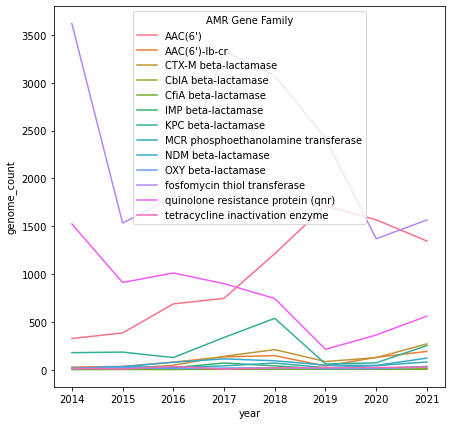

In [197]:
f, ax = plt.subplots(figsize=(7, 7))
#ax.set(yscale="log")
sns.color_palette("tab10")
sns.lineplot(data=fam_df, x="year", y="genome_count", hue="AMR Gene Family")#.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(WRK+"rgi_analysis/analysis/genes_over_time/rough_line_plot.png")

In [111]:
### Wanted to notmalize to the cost of sequencing but that's no go.
seq_cost=pd.read_csv(WRK+"rgi_analysis/analysis/genes_over_time/cost_per_mb_per_year.txt",sep='\t')
seq_cost["year"]=seq_cost["Date"].str.split("-").str[1]
seq_cost["year"]="20"+seq_cost["year"]
seq_cost["year"]=seq_cost["year"].astype('int')
seq_cost["Cost per Mb"]=seq_cost["Cost per Mb"].astype('float')
seq_cost_mean=seq_cost.groupby("year").mean()



In [112]:
seq_cost_mean.loc[2002][0]

3656.2200000000003

In [113]:
plot_tab=pd.DataFrame()
for name, group in count_moors.groupby(["AMR Gene Family"]):
    total_list=[]
    total=0
    n_total=0
    for index, row in group.sort_values("year").iterrows():      
        total+=row["genome_count"]
        norm=seq_cost_mean.loc[row["year"]][0]*100
        n_total+=norm
        total_list.append([total, norm, n_total])
    group[["cumulative_count","norm_count","norm_cumulative"]]=total_list
    
    #if total >= 100:
    plot_tab=plot_tab.append(group)
plot_tab.head(2)

,AMR Gene Family,year,genome_count,cumulative_count,norm_count,norm_cumulative
0,16S rRNA methyltransferase (A1408),2016,1,1.0,1.50,1.50
2,16S rRNA methyltransferase (G1405),2011,5,5.0,15.75,15.75


In [98]:
plot_tab

,AMR Gene Family,year,genome_count,cumulative_count,norm_count,norm_cumulative
2,16S rRNA methyltransferase (G1405),2011,5,5.0,15.750000,15.750000
3,16S rRNA methyltransferase (G1405),2012,15,20.0,7.500000,23.250000
4,16S rRNA methyltransferase (G1405),2013,28,48.0,6.000000,29.250000
5,16S rRNA methyltransferase (G1405),2014,84,132.0,5.000000,34.250000
6,16S rRNA methyltransferase (G1405),2015,159,291.0,2.975000,37.225000
...,...,...,...,...,...,...
2138,vanZ; glycopeptide resistance gene cluster,2015,37,221.0,2.975000,217.225000
2139,vanZ; glycopeptide resistance gene cluster,2016,45,266.0,1.500000,218.725000
2140,vanZ; glycopeptide resistance gene cluster,2017,54,320.0,1.475000,220.200000
2141,vanZ; glycopeptide resistance gene cluster,2018,137,457.0,1.525000,221.725000


In [49]:
drop_years=[2019, 2020, 2022]

### What will be the final counts of genomes available?

In [168]:
genbank_filtered=pd.read_csv(WRK+"genbank_download_prep/compile_download_list/22-2-14_genbank_bacterial_FURTHUR_exclusion_filtered.txt", sep='\t')
genbank_filtered["year"]=genbank_filtered["seq_rel_date"].str.split("/").str[0]

,Unnamed: 0,# assembly_accession,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,...,superkingdom,kingdom,phylum,class,order,family,genus,species,tax_name,tax_name_genus
0,0,GCA_000003135.1,PRJNA31437,SAMN00001475,ACHI00000000.1,na,548480,216816,Bifidobacterium longum subsp. longum ATCC 55813,strain=ATCC 55813,...,Bacteria,NaN,Actinobacteria,Actinomycetia,Bifidobacteriales,Bifidobacteriaceae,Bifidobacterium,Bifidobacterium longum,Bifidobacterium longum subsp. longum ATCC 55813,Bifidobacterium
1,1,GCA_000003215.1,PRJNA20093,SAMN02470531,ABFD00000000.2,na,455631,1496,Clostridioides difficile QCD-66c26,NaN,...,Bacteria,NaN,Firmicutes,Clostridia,Eubacteriales,Peptostreptococcaceae,Clostridioides,Clostridioides difficile,Clostridioides difficile QCD-66c26,Clostridioides
2,2,GCA_000003645.1,PRJNA29657,SAMN00717290,ACLS00000000.1,na,526973,1396,Bacillus cereus m1293,strain=m1293,...,Bacteria,NaN,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus,Bacillus cereus,Bacillus cereus m1293,Bacillus
3,3,GCA_000003925.1,PRJNA29701,SAMN00727646,ACMU00000000.1,na,526997,1405,Bacillus mycoides DSM 2048,strain=DSM 2048,...,Bacteria,NaN,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus,Bacillus mycoides,Bacillus mycoides DSM 2048,Bacillus
4,4,GCA_000003955.1,PRJNA29699,SAMN00727677,ACMT00000000.1,na,526994,1396,Bacillus cereus AH1273,strain=AH1273,...,Bacteria,NaN,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus,Bacillus cereus,Bacillus cereus AH1273,Bacillus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965955,1110483,GCA_928392785.1,PRJEB49523,SAMEA11953793,CAKMTM000000000.1,na,85336,85336,Rothia nasimurium,strain=4QC2O2,...,Bacteria,NaN,Actinobacteria,Actinomycetia,Micrococcales,Micrococcaceae,Rothia,NaN,Rothia nasimurium,Rothia
965956,1110484,GCA_928392795.1,PRJEB49523,SAMEA11953797,CAKMTJ000000000.1,na,85336,85336,Rothia nasimurium,strain=15QC2CO,...,Bacteria,NaN,Actinobacteria,Actinomycetia,Micrococcales,Micrococcaceae,Rothia,NaN,Rothia nasimurium,Rothia
965957,1110485,GCA_928392805.1,PRJEB49523,SAMEA11953784,CAKMTK000000000.1,na,2109647,2109647,Rothia nasisuis,strain=152RC1,...,Bacteria,NaN,Actinobacteria,Actinomycetia,Micrococcales,Micrococcaceae,Rothia,NaN,Rothia nasisuis,Rothia
965958,1110486,GCA_928392915.1,PRJEB49523,SAMEA11953811,CAKMTL000000000.1,na,85336,85336,Rothia nasimurium,strain=68RC1,...,Bacteria,NaN,Actinobacteria,Actinomycetia,Micrococcales,Micrococcaceae,Rothia,NaN,Rothia nasimurium,Rothia


In [170]:
genbank_filtered["seq_rel_date"][0]

'2009/05/05'

In [173]:
genomes_year=genbank_filtered.groupby(["year"]).size().reset_index(name="genome_year_count")
genomes_year["year"]=genomes_year["year"].astype('int')
genomes_year.sort_values("year")

,year,genome_year_count
0,1999,4
1,2000,1
2,2001,8
3,2002,16
4,2003,48
5,2004,80
6,2005,74
7,2006,168
8,2007,279
9,2008,260


<AxesSubplot:xlabel='year', ylabel='year_count'>

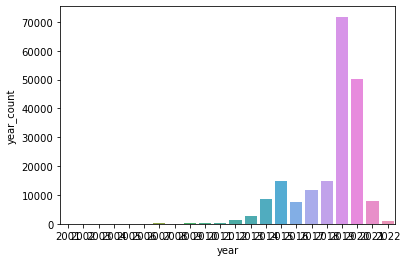

In [175]:
sns.barplot(data=genomes_per_year, x="year", y="year_count")